In [ ]:
# EXECUT

In [ ]:
# IMPORT PACKAGES
import os
import subprocess

# DEFINE CONSTANTS
CURRENT_FOLDER = os.getcwd()
DATA_FOLDER = os.path.join(CURRENT_FOLDER,"data")


def organiser(folder):
    # READS ORIGINAL SIZE OF THE DATA
    original_size = subprocess.check_output("du -sh {}".format(DATA_FOLDER), shell=True)
    original_size = original_size.decode('ascii')
    
    # LIST ALL FOLDERS IN DATA folder
    output_ls = subprocess.check_output("ls {}".format(folder), shell=True)
    # TRANSFORM TEXT OUTPUT FROM output_ls TO A PYTHON LIST
    parsed_output_ls = [item.strip().decode('ascii') for item in output_ls.split()]
    
    # REMOVE ALL FILES EXCEPT FOR FILES WITH THE FOLLOWING NAME PDBCODE_chain_CHAIN.fasta and PDBCODE_chain_CHAIN.pdb
    for entry in parsed_output_ls:
        pdb_code = entry.split("_")[0]
        chain = entry.split("_")[1]    
        subprocess.run(f"find {folder}/{pdb_code}_{chain} ! \\( -name '{pdb_code}_chain_{chain}.fasta' -o -name '{pdb_code}_chain_{chain}.pdb' \\) -type f -exec rm -f {{}} +", shell=True)
    
    # READS SIZE OF folder AFTER REMOVING UNWANTED FILES
    final_size = subprocess.check_output(f"du -sh {folder}", shell=True)
    final_size = final_size.decode('ascii')
   
    
    print(f"Before: {original_size}")
    print(f"After: {final_size}")
    return True
    
organiser(DATA_FOLDER)


True

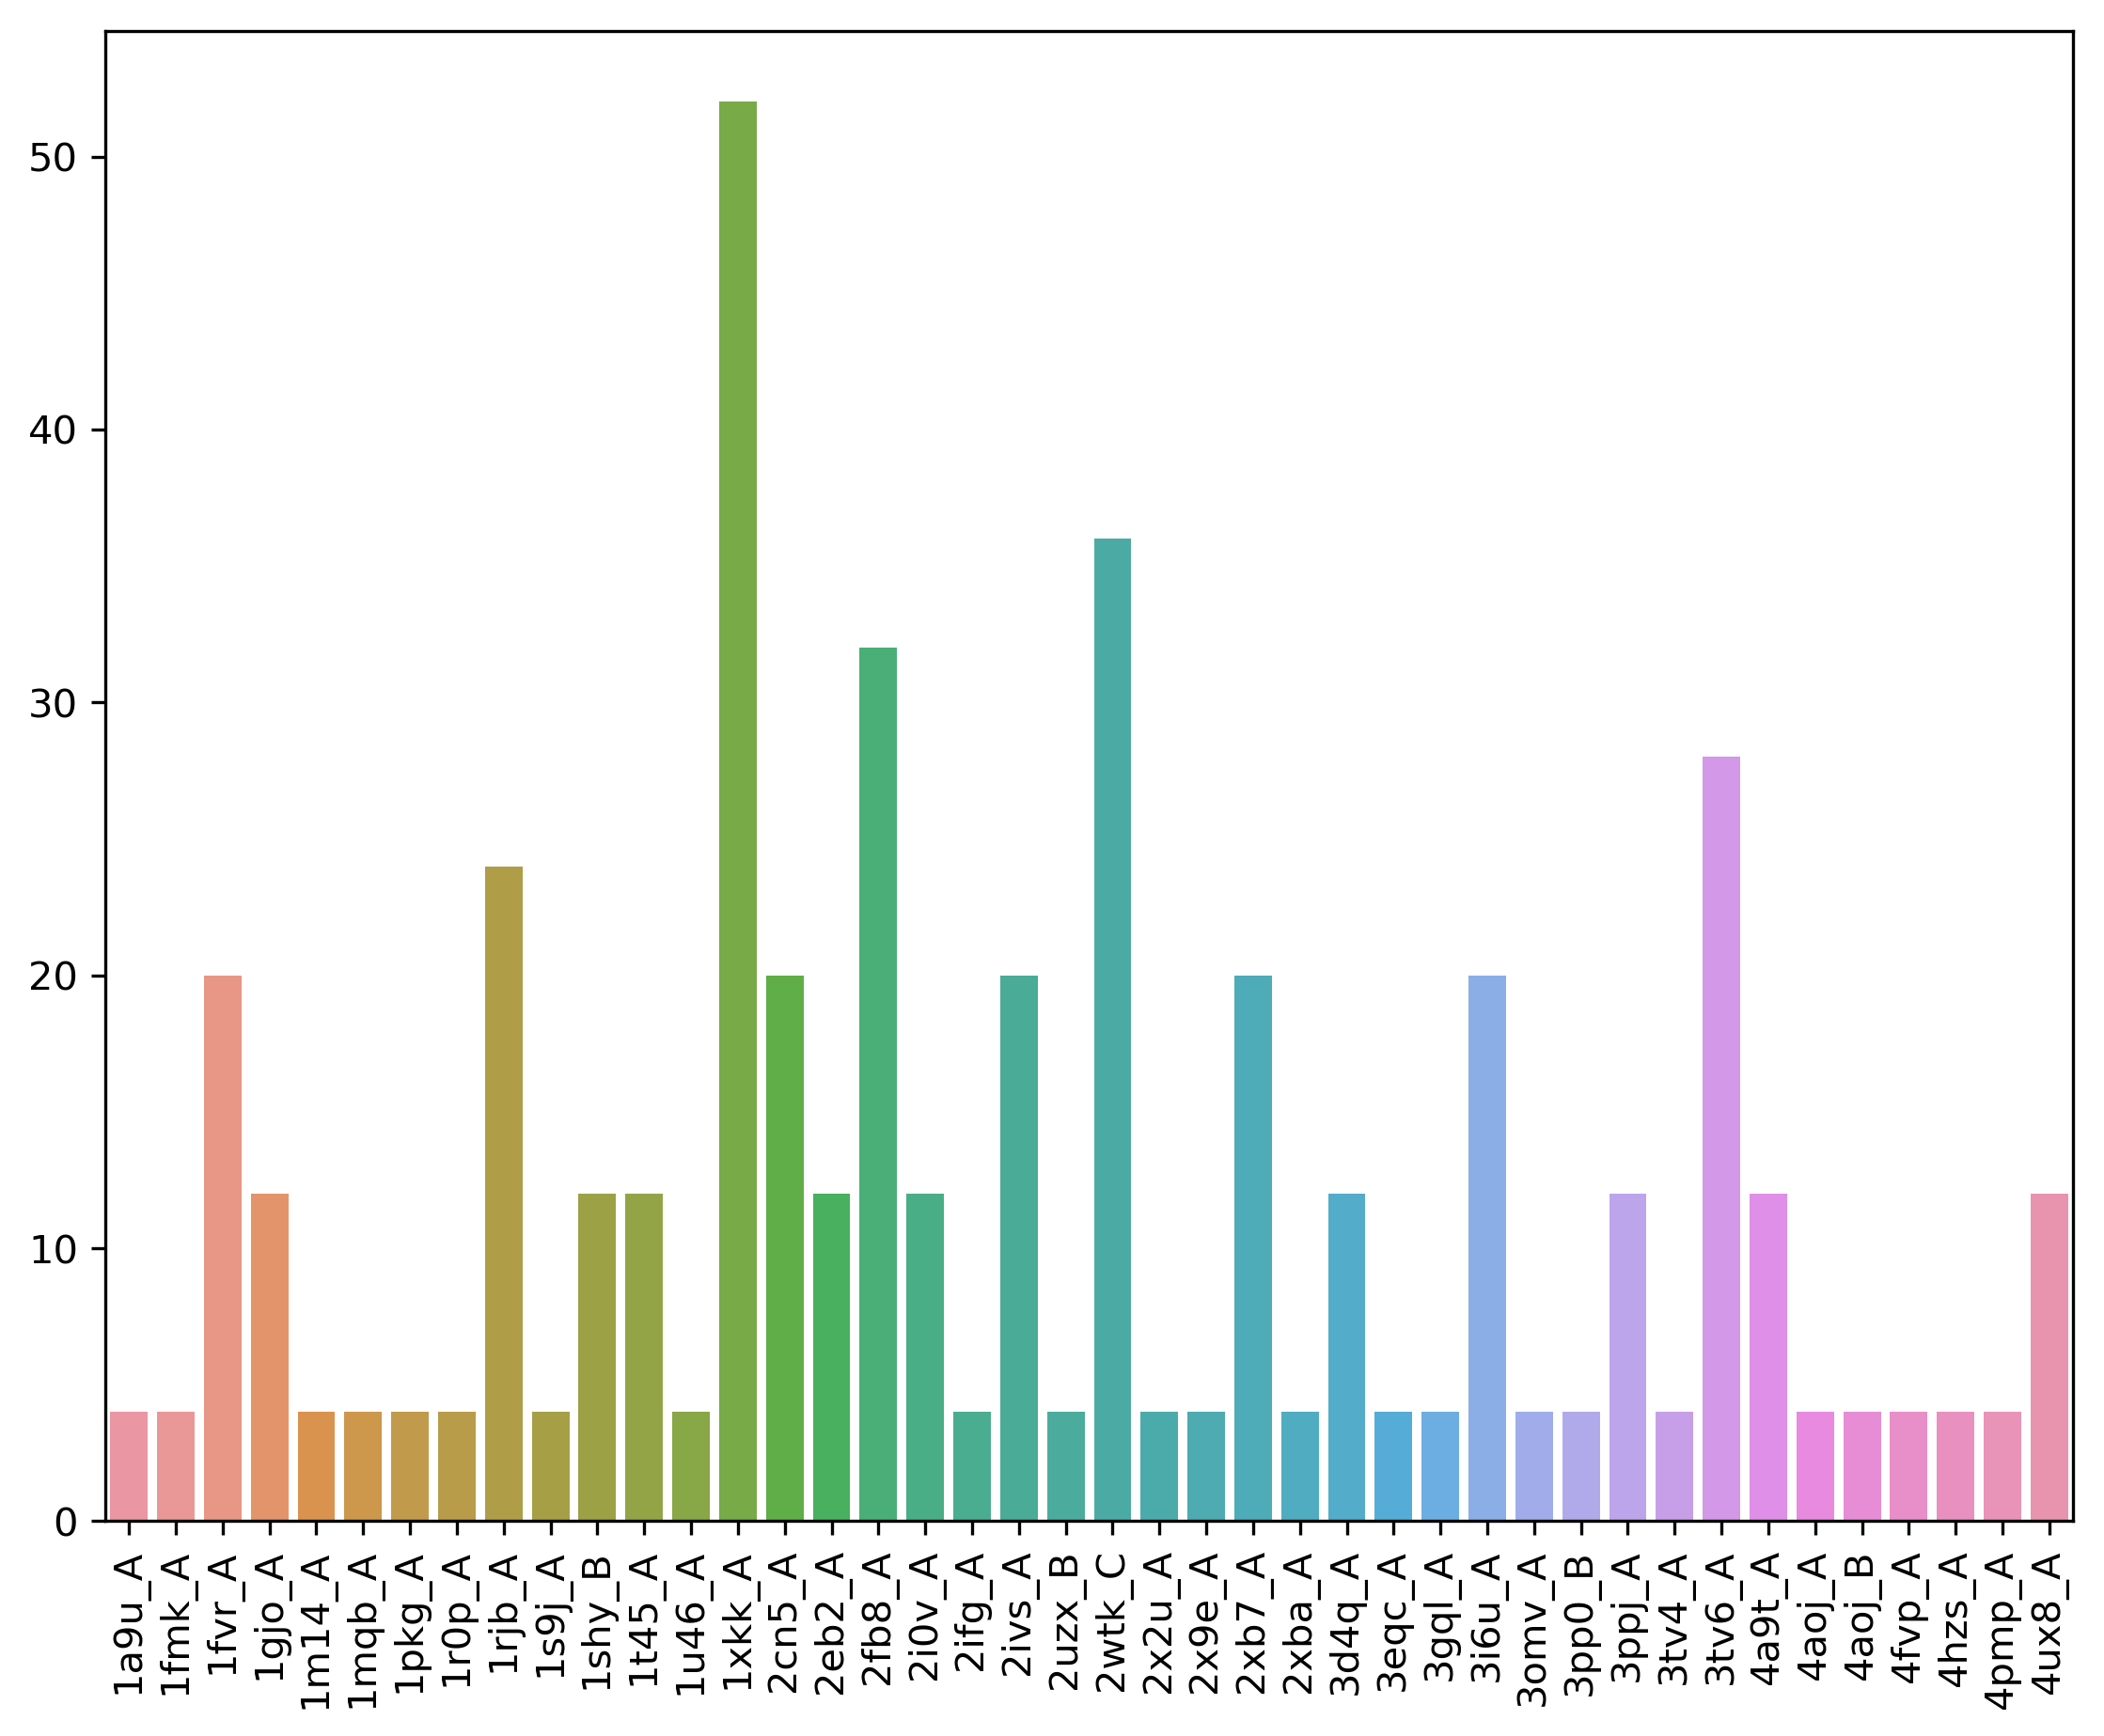

In [19]:
# IMPORT PACKAGES
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import os

# DEFINE CONSTANTS
CURRENT_FOLDER = os.getcwd()
DATA_FOLDER = os.path.join(CURRENT_FOLDER,"data")


def plot_data_size(folder):
    # READS ORIGINAL SIZE OF THE DATA
    output_ls = subprocess.check_output("ls -lh {}".format(DATA_FOLDER), shell=True)
    parsed_output_ls = [item.strip() for item in output_ls.decode('ascii').split('\n')]
    
    # GET ALL SIZES AND POPULATE WITH DICTIONARY
    folder_size_dict = dict()
    for entry in parsed_output_ls[1:-1]:
        folder_name = entry.split()[-1]
        folder_size = float(entry.split()[4][:-1])
        folder_size_dict[folder_name] = folder_size
    
    # PLOT FILE SIZES
    plt.figure(figsize=(9,7), dpi=300)
    sns.barplot(x=list(folder_size_dict.keys()), y=list(folder_size_dict.values()))
    plt.xticks(rotation=90)
    return True

plot_data_size(DATA_FOLDER)
